# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>K-Nearest Neighbors</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)
<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

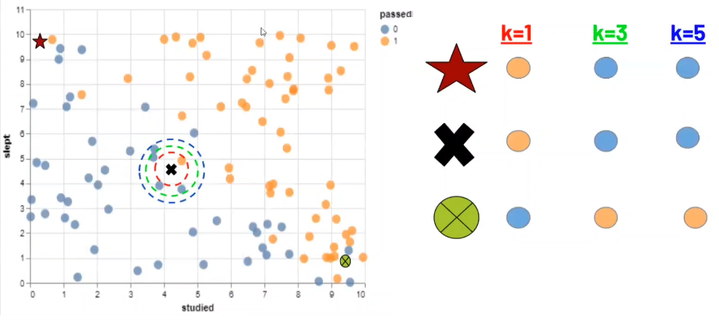

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("gene_expression.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [5]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

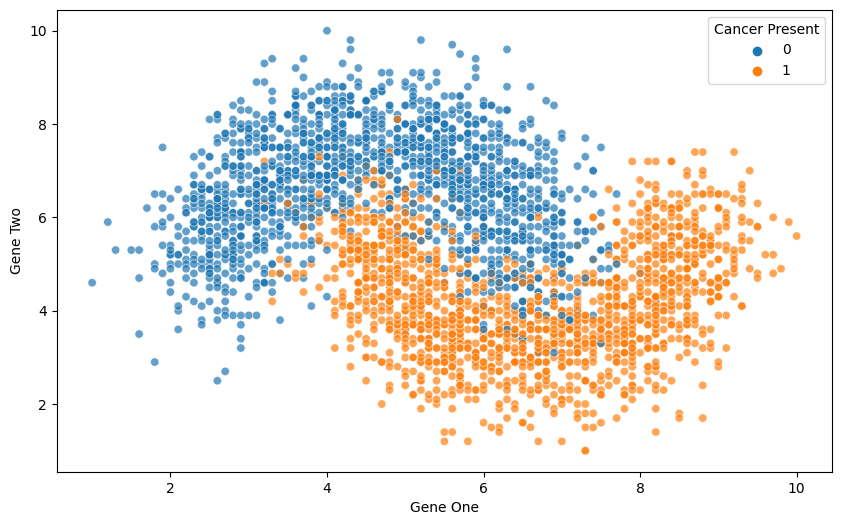

In [6]:
sns.scatterplot(x="Gene One", y="Gene Two", hue="Cancer Present", data=df, alpha=0.7);

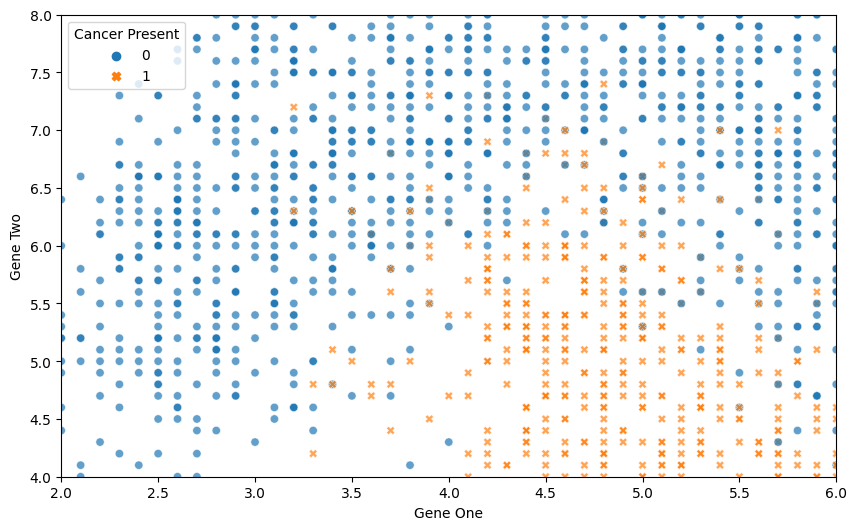

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8);

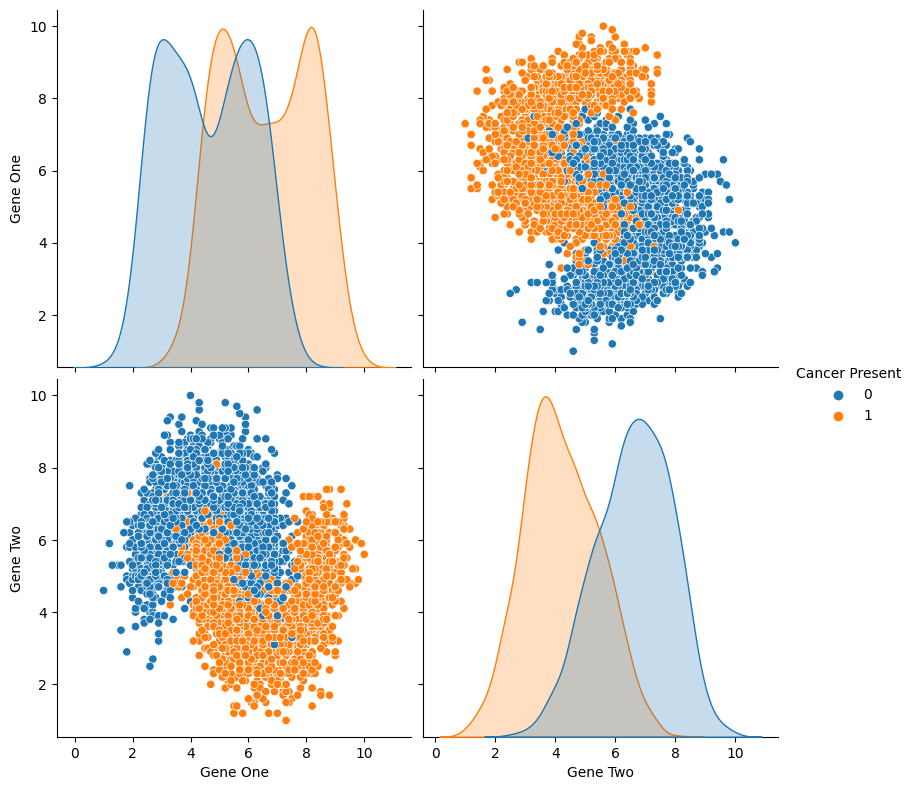

In [8]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect=1);

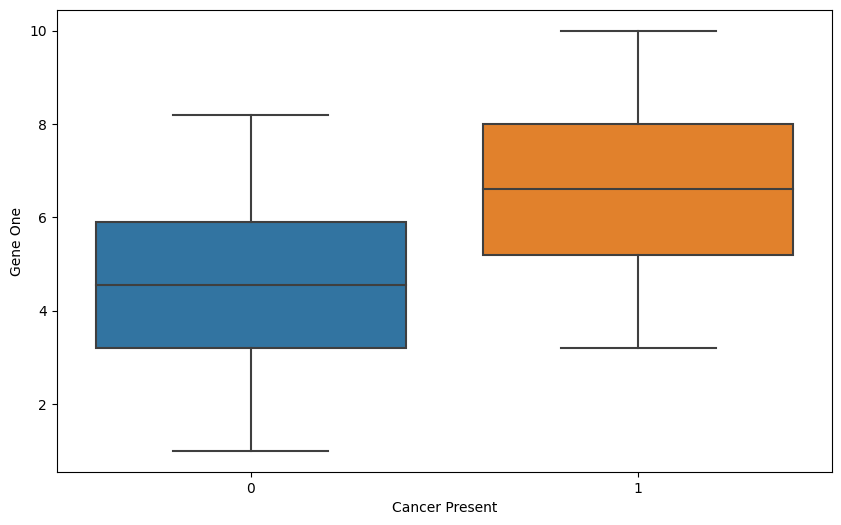

In [9]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data=df);

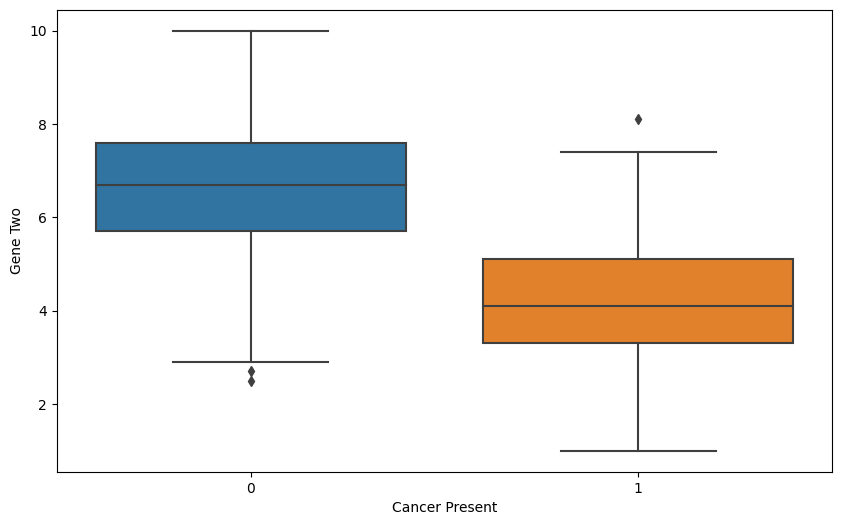

In [10]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data=df);

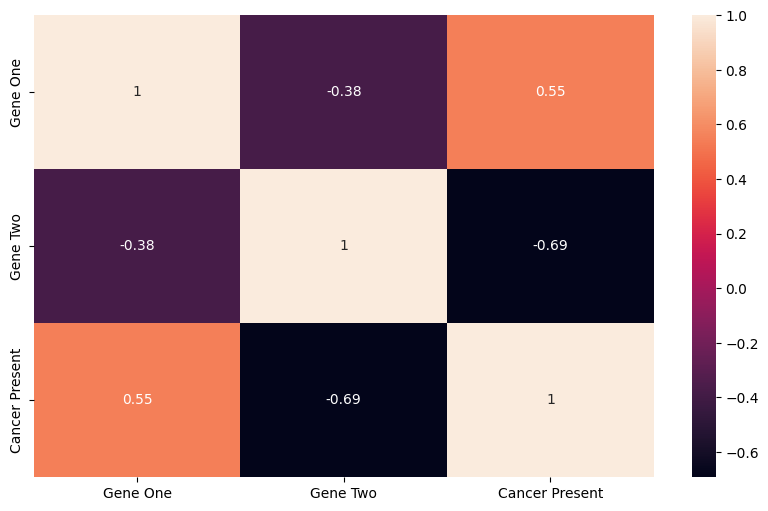

In [11]:
sns.heatmap(df.corr(), annot=True);

Azra Hocam: Gen 1 ekspresyonu olan hastalarda kanser riski yuksek iken , Gen 2 ekspresyonu olanlarda risk azalir

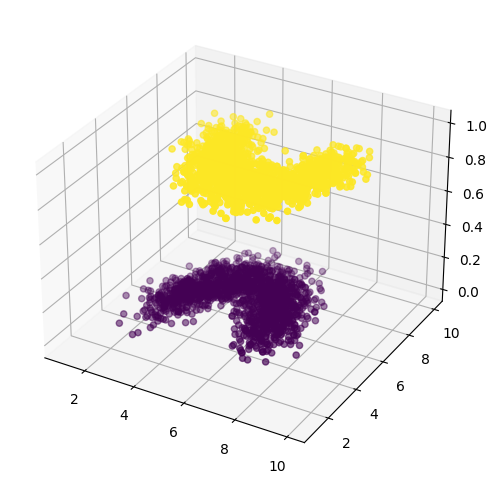

In [12]:
%matplotlib inline
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

# Train | Test Split and Scaling Data

In [13]:
X = df.drop("Cancer Present", axis=1)
y = df["Cancer Present"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

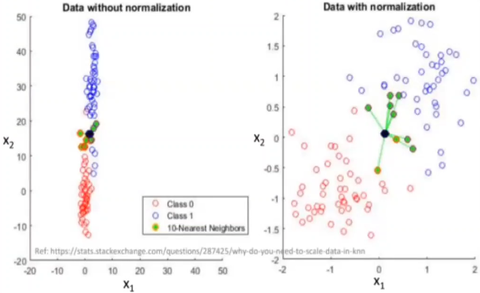

Veri kümesine ve probleme özgü olarak, deneyerek en uygun scale yöntemini belirlemek faydalı olacaktır.

Verilerin Ölçeği: Featurelerin değer aralıkları önemlidir. Özellikler arasında büyük değer farklılıkları varsa, Min-Max Ölçeklendirme kullanmak uygun olabilir. Ancak, değerler arasında büyük bir ölçek farkı yoksa, Z-Skor Ölçeklendirme (Standartlaştırma) daha uygun olabilir. Örnek:

Özellik 1: 0 ile 100 arasında değerler alır. Özellik 2: -1 ile 1 arasında değerler alır. Bu durumda, Z-Skor Ölçeklendirme daha uygun olabilir, çünkü Min-Max Ölçeklendirme, özellik 1'in ölçeğini daraltarak veri kaybına neden olabilir.

Dağılım ve Aykırı Değerler: Eğer veriler normal bir dağılıma sahipse ve aykırı değerler azsa, Z-Skor Ölçeklendirme (StandardScaler) uygun olabilir. Ancak, verilerin dağılımı dengesiz veya aykırı değerler çok fazlaysa, Min-Max (MinmaxScaler) Ölçeklendirme bu duruma daha iyi uyabilir.

Kategorik Veriler: Eğer verilerde kategorik özellikler varsa ve sıralama aralığı yoksa, Min-Max (MinmaxScaler) Ölçeklendirme kullanmak anlamlı olmayabilir.

Model Bağımlılığı: Kullanılacak modelin ölçeklendirmeye duyarlılığı da dikkate alınmalıdır. Örneğin, KNN gibi bir model, uzaklık hesaplamalarına dayandığından, özelliklerin ölçeklendirilmesi bu modele önemli ölçüde etki eder.

Hiperparametre Ayarlaması: Bazı makine öğrenme algoritmaları, özelliklerin ölçeklendirilmesine bağlı olarak farklı hiperparametre değerlerine ihtiyaç duyabilir. Bu durumda, farklı ölçeklendirme yöntemlerini deneyerek en iyi sonuçları elde etmek mümkün olabilir.

Sonuç olarak, hangi ölçeklendirme yönteminin kullanılacağı veri kümesinin doğasına, özelliklerin dağılımına, kullanılacak modelin özelliklerine ve hiperparametre ayarlamalarına bağlıdır.

# Scaling

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors = k degerini burada veriyoruz

In [20]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [22]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [23]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


**uniform:**
Her bir komşunun oyu eşit ağırlığa sahiptir.
Daha basit bir yaklaşımdır.
Komşuların sorgulanan noktaya olan uzaklıkları bu yaklaşımda önemli değildir; yani en yakın komşu da en uzaktaki komşu da aynı derecede etkilidir.
**distance:**
Komşuların oyları, sorgulanan noktaya olan uzaklıklarının tersiyle orantılı olarak ağırlıklandırılır.
Bu yaklaşım, daha yakın komşuların sınıflandırma veya regresyon sonucuna daha fazla katkıda bulunmasını sağlar.
Gürültülü verilerde bazen overfitting'e yol açabilir, çünkü bireysel veri noktalarının etkisi daha belirgin hale gelir.
- Veri Dağılımı: Eğer veri setindeki örnekler belirli bölgelerde yoğunlaşıyorsa (yani bir sınıfın örnekleri diğer sınıfa göre belirli bir bölgede yoğunlaşıyorsa), distance yaklaşımı daha anlamlı olabilir. Ancak veri seti gürültülüyse, uniform yaklaşımı bazen daha istikrarlı sonuçlar verebilir.
- Veri Boyutu: Çok büyük veri setleri için uniform genellikle daha hızlı çalışırken, distance yönteminin hesaplamaları biraz daha karmaşık olabilir.
- Gürültü: Eğer veri seti gürültülüyse, distance yöntemi bazı durumlarda aşırı uyuma (overfitting) yol açabilir. Bu nedenle bu tür veri setlerinde dikkatli olunmalıdır.
- Çapraz Doğrulama: Modelin performansını değerlendirmek için çapraz doğrulama kullanılabilir. Hem uniform hem de distance seçenekleri farklı veri alt kümeleri üzerinde test edilerek hangi yöntemin genel olarak daha iyi sonuç verdiği belirlenebilir.
**Sonuç olarak, hangi seçeneğin daha uygun olduğuna karar verirken spesifik veri setinin özelliklerini ve ihtiyaçları dikkate almak önemlidir. En iyi yaklaşımı belirlemek için çapraz doğrulama gibi yöntemlerle deneyler yapmak genellikle faydalıdır.**
**noisy data (Gürültülü data):** Gürültü, veri toplama hatalarından, cihazlardaki ölçüm hatalarından veya eksik veriden kaynaklanabilir. Gürültünün doğası ve kaynağına bağlı olarak, modelin hata oranı üzerindeki etkisi değişebilir.

In [24]:
# !pip install mglearn

In [25]:
import mglearn

In [26]:
print(mglearn.__version__)

0.1.9


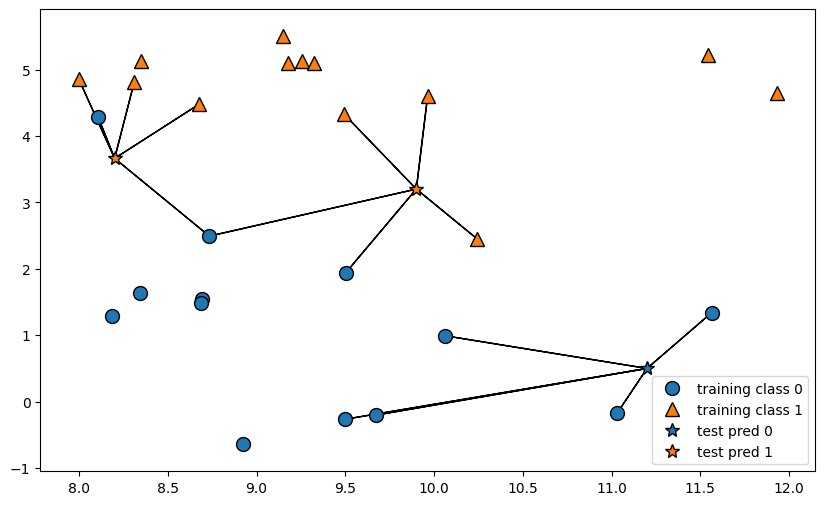

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [28]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [29]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2546,0,0,0.0,1.0
535,1,1,1.0,0.0
358,1,1,0.8,0.2
296,0,1,1.0,0.0
1553,0,0,0.0,1.0
67,0,0,0.0,1.0
1323,1,0,0.0,1.0
2934,0,0,0.0,1.0
2280,0,0,0.0,1.0
2167,0,0,0.0,1.0


## Model Performance on Classification Tasks

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

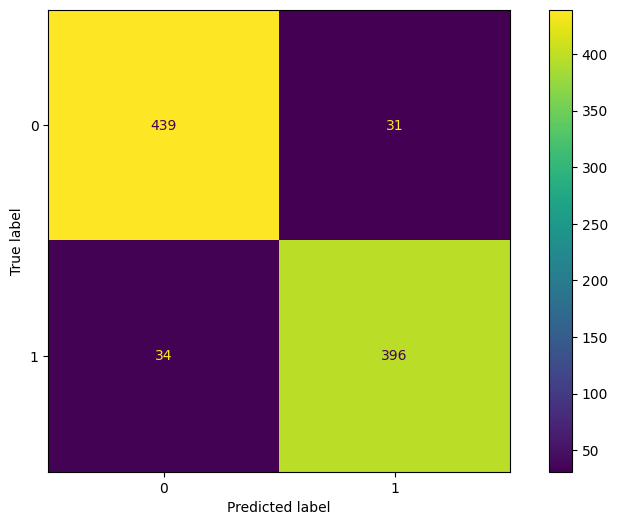

In [32]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



# For Optimum k -> Elbow Method or Gridsearch

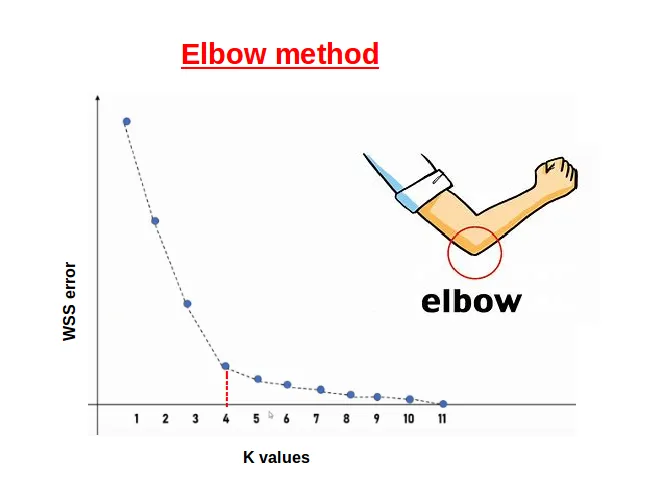

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

## Optimum k parameter

In [35]:
test_error_rates = []
train_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

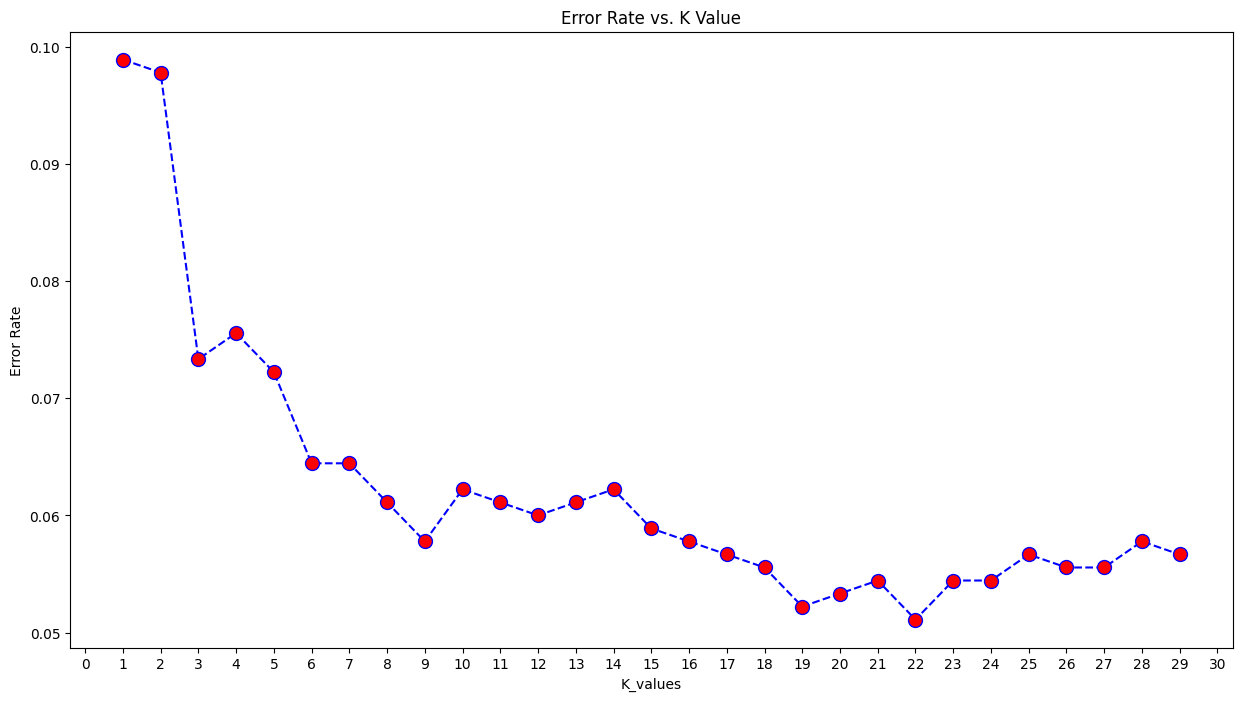

In [36]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.xticks(range(0, 31, 1));

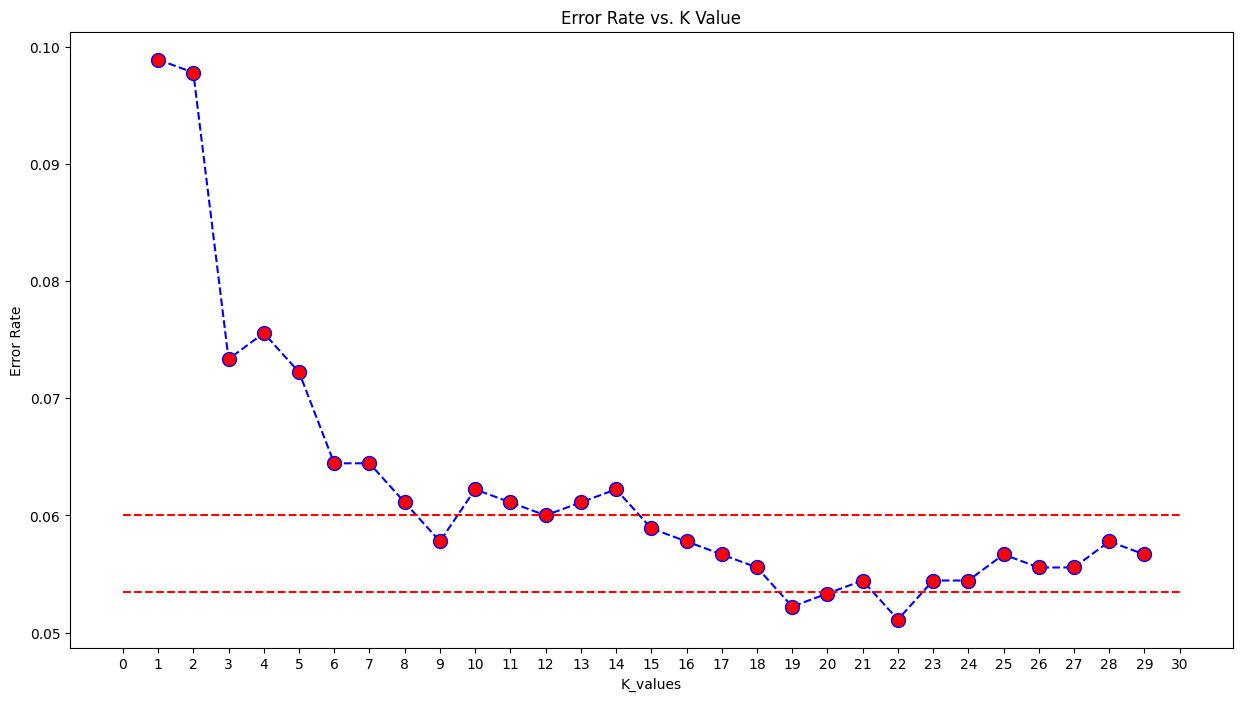

In [37]:
plt.figure(figsize=(15,8))
# Test error rates için mavi çizgi
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0535, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.060, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# X eksenindeki değerleri 2'şer 2'şer göster
plt.xticks(range(0, 31, 1));

In [38]:
"""
plt.figure(figsize=(15,8))
# Test error rates için mavi çizgi
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
# Train error rates için yeşil çizgi
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# X eksenindeki değerleri 2'şer 2'şer göster
plt.xticks(range(0, 31, 1));
"""

'\nplt.figure(figsize=(15,8))\n# Test error rates için mavi çizgi\nplt.plot(range(1,30), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\n# Train error rates için yeşil çizgi\nplt.plot(range(1,30), train_error_rates, color=\'green\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'blue\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.051, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.057, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n# X eksenindeki değerleri 2\'şer 2\'şer göster\nplt.xticks(range(0, 31, 1));\n'

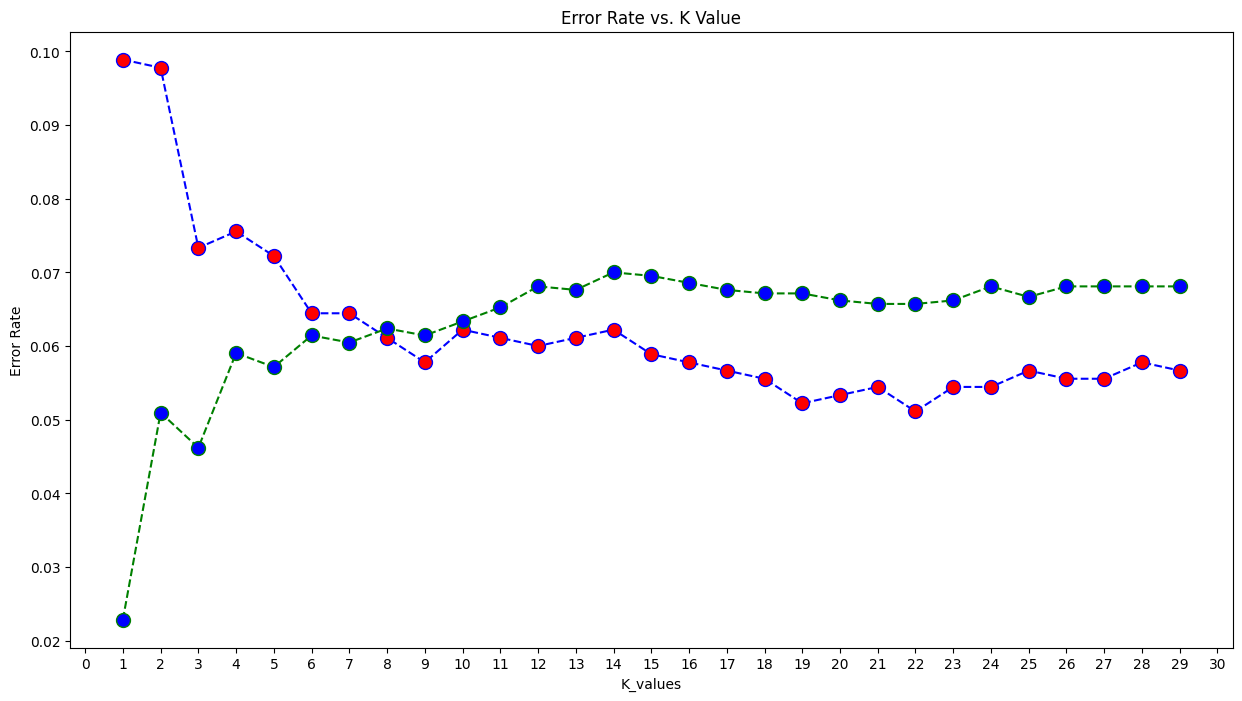

In [39]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.xticks(range(0, 31, 1));

## Scores by Various K Values

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [43]:
k_list = [3, 6, 9, 16, 18, 21, 26]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled,y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) 

WITH K=3

Test_Set

[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set

[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

WITH K=6

Test_Set

[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   

## Cross Validation for Optimal k value

In [44]:
from sklearn.model_selection import cross_val_score, cross_validate

In [45]:
model = KNeighborsClassifier(n_neighbors=9)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001007,0.008460,0.923810,0.933333,0.915888,0.924528
2,0.001004,0.007382,0.947619,0.944444,0.953271,0.948837
3,0.001023,0.006003,0.947619,0.970588,0.925234,0.947368
4,0.001022,0.008940,0.866667,0.876190,0.859813,0.867925
5,0.000522,0.006040,0.923810,0.909910,0.943925,0.926606
6,0.001001,0.007748,0.919048,0.924528,0.915888,0.920188
7,0.000998,0.006037,0.942857,0.927928,0.962617,0.944954
8,0.001002,0.007291,0.938095,0.927273,0.953271,0.940092
9,0.001017,0.006606,0.961905,0.980583,0.943925,0.961905
10,0.001029,0.007188,0.890476,0.868421,0.925234,0.895928


In [46]:
df_scores.mean()[2:]

test_accuracy     0.926190
test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
dtype: float64

In [47]:
model = KNeighborsClassifier(n_neighbors=22)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001542,0.008119,0.933333,0.942857,0.925234,0.933962
2,0.002065,0.006446,0.957143,0.945455,0.971963,0.958525
3,0.002025,0.007270,0.947619,0.970588,0.925234,0.947368
4,0.001000,0.007591,0.861905,0.867925,0.859813,0.863850
5,0.000516,0.008044,0.938095,0.943396,0.934579,0.938967
6,0.001033,0.006564,0.909524,0.907407,0.915888,0.911628
7,0.001517,0.008892,0.933333,0.926606,0.943925,0.935185
8,0.001519,0.007142,0.933333,0.934579,0.934579,0.934579
9,0.001022,0.006927,0.947619,0.980000,0.915888,0.946860
10,0.001025,0.007177,0.904762,0.884956,0.934579,0.909091


In [48]:
df_scores.mean()[2:]

test_accuracy     0.926667
test_precision    0.930377
test_recall       0.926168
test_f1           0.928002
dtype: float64

In [49]:
model = KNeighborsClassifier(n_neighbors=21)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001632,0.007466,0.933333,0.942857,0.925234,0.933962
2,0.002029,0.006409,0.957143,0.945455,0.971963,0.958525
3,0.001016,0.007475,0.952381,0.970874,0.934579,0.952381
4,0.001603,0.007703,0.866667,0.855856,0.887850,0.871560
5,0.001020,0.009892,0.947619,0.944444,0.953271,0.948837
6,0.001000,0.010085,0.914286,0.908257,0.925234,0.916667
7,0.001509,0.007413,0.933333,0.926606,0.943925,0.935185
8,0.001019,0.006783,0.938095,0.935185,0.943925,0.939535
9,0.001004,0.007935,0.952381,0.980198,0.925234,0.951923
10,0.001322,0.007029,0.909524,0.885965,0.943925,0.914027


In [50]:
df_scores.mean()[2:]

test_accuracy     0.930476
test_precision    0.929570
test_recall       0.935514
test_f1           0.932260
dtype: float64

## Predict New Observation

In [51]:
new_observation = [[3.5, 4.3], [4.2, 5.7], [2.8, 4.3]]

In [52]:
knn_model.predict(new_observation)

array([1, 1, 0], dtype=int64)

In [53]:
knn_model.predict_proba(new_observation)

array([[0.34482759, 0.65517241],
       [0.48275862, 0.51724138],
       [0.65517241, 0.34482759]])

In [54]:
new_observation_scaled = scaler. transform(new_observation)

In [55]:
knn_model.predict(new_observation_scaled)

array([0, 1, 0], dtype=int64)

In [56]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034],
       [0.20689655, 0.79310345],
       [0.96551724, 0.03448276]])

## Gridsearch Method for Choosing Reasonable K Values

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
knn_grid = KNeighborsClassifier()

In [59]:
k_values= range(1,30)

In [60]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [61]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring="accuracy")

In [62]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [63]:
knn_grid_model.best_score_

0.9304761904761906

In [64]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

## Evaluating ROC Curves and AUC

In [65]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

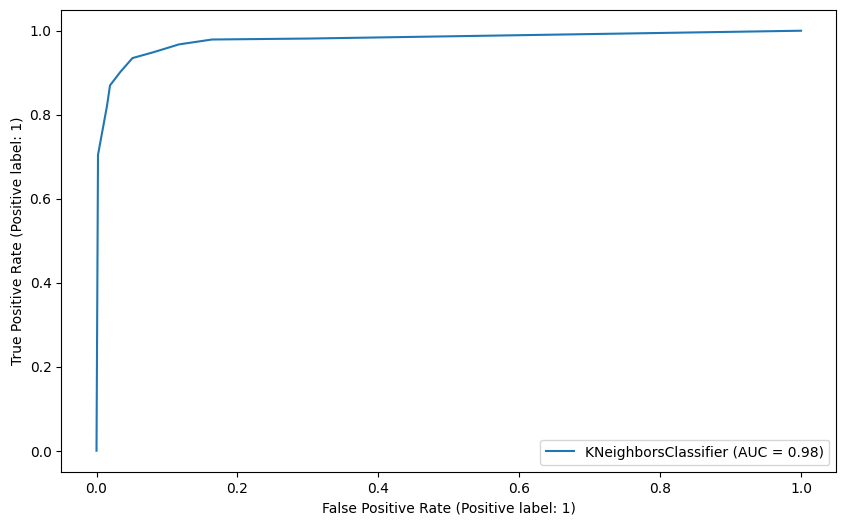

In [67]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [68]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

# Final Model and Model Deployment

In [69]:
import pickle

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(X)

StandardScaler()

In [72]:
X_scaled = scaler.transform(X)

In [73]:
final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled, y)

In [74]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

# Predict New Observations

In [75]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [76]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [77]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [78]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [79]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [80]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


# Pipeline

In [81]:
from sklearn.pipeline import Pipeline

### İşte tipik bir veri ön işleme sıralaması örneği:
1) Eksik Değerlerin Doldurulması
2) Sayısal Verilerin Ölçeklendirilmesi
3) Kategorik Verilerin Kodlanması
4) Boyut İndirgeme
5) Özellik Seçimi
- Her adım, sonraki adım için verileri uygun bir formata getirir, bu yüzden sıralama önemlidir.
- Ancak, her veri seti ve problem özeldir, bu yüzden en iyi ön işleme akışını belirlemek için verilerinizin doğasını ve seçtiğiniz modelin gereksinimlerini dikkate almalısınız.

In [83]:
steps = [("scaler", StandardScaler()), ("knn", knn_model)]

# steps = [("scaler", StandardScaler()), ("knn", KneighborsClassifier())]

In [84]:
Pipeline(steps=steps)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [85]:
pipe_model = Pipeline(steps=steps)

In [86]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [90]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

# Model Performance

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

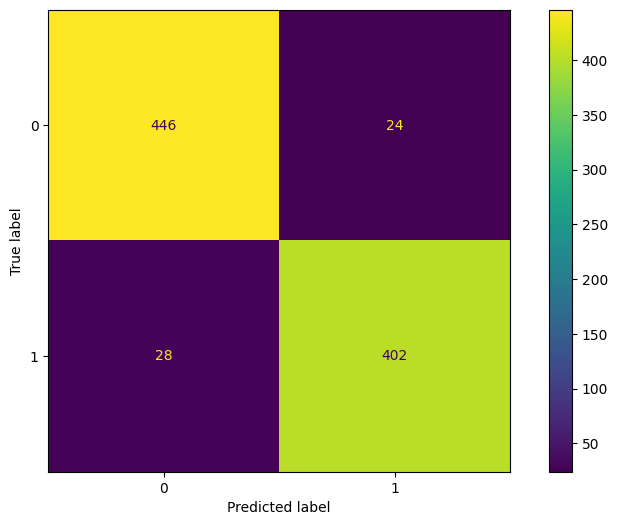

In [93]:
plot_confusion_matrix(pipe_model, X_test, y_test);

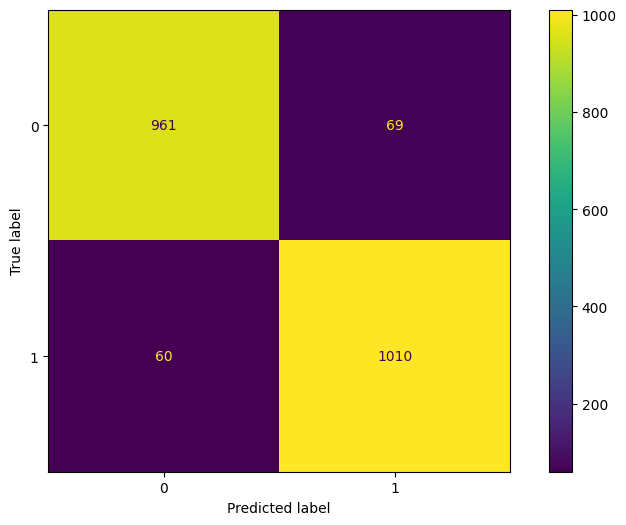

In [94]:
plot_confusion_matrix(pipe_model, X_train, y_train);

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [95]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [96]:
pipe_model.set_params(knn__n_neighbors = 5)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [97]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [99]:
pipe_model["scaler"]

StandardScaler()

In [101]:
pipe_model["knn"]  # presictions = pipe_mode["knn"].

KNeighborsClassifier()

In [102]:
pipe_model["knn"].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [103]:
pipe_model["scaler"].get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

# Examples

**Examples endet**

# GridSearch on Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

In [108]:
steps = [("scaler", StandardScaler()), ("knn", knn_model)]

In [109]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline(steps=steps)

In [110]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring="f1")

In [111]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [112]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

In [114]:
steps = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=21))]
model = Pipeline(steps)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.929589
test_recall       0.936449
test_f1           0.932762
test_accuracy     0.930952
dtype: float64

## Neden Data Leakage olur?
Çapraz doğrulama, veri setini bir dizi eğitim ve test setine ayırır. Eğer ölçeklendirme işlemi tüm veri seti üzerinde çapraz doğrulamadan önce yapılırsa, test seti bilgileri (örneğin, özelliklerin ortalaması ve standart sapması) ölçeklendirme işlemi sırasında dolaylı olarak eğitim setine "sızdırılır". Bu, modelin test seti üzerindeki gerçek performansını doğru bir şekilde ölçmeyi zorlaştırır, çünkü model, aslında test seti hakkında önceden bilgi sahibi olur.
## Doğru yaklaşım nasıl olmalı?
Doğru yaklaşım, ölçeklendirme işlemini çapraz doğrulamanın her bir iterasyonunda, yalnızca o iterasyonda kullanılan eğitim verisi üzerinde yapmaktır. Böylece, her bir test seti, model eğitimi sırasında hiç görülmemiş olarak kalır ve data leakage önlenmiş olur. Bu yaklaşımı uygulamanın en kolay yolu, ölçeklendiriciyi ve modeli bir Pipeline nesnesi içinde birleştirmek ve bu pipeline'ı çapraz doğrulama için kullanmaktır.

In [115]:
steps = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [116]:
pipe_final = Pipeline(steps)

# Final Model

In [117]:
from joblib import dump, load

In [118]:
dump(pipe_final, 'final_model.joblib')

['final_model.joblib']

In [119]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [120]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [121]:
predictions = loaded_model.predict(samples)
predictions

array([0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [122]:
predictions_proba = loaded_model.predict_proba(samples)
predictions_proba

array([[0.88888889, 0.11111111],
       [0.55555556, 0.44444444],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [123]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.111111
1,3.0,4.0,0,0.444444
2,4.3,4.0,1,1.000000
3,5.6,5.5,1,1.000000
4,7.0,6.7,1,1.000000
5,9.5,10.0,1,0.888889
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
